# Model Comparison

---

## VGG16

The botleneck features for the VGG16 deep learning are imported in the cell below for the training, validation and test datasets.

In [2]:
import numpy as np

from preprocess import *

bottleneck_features = np.load('data/bottleneck_features/yelp_vgg16.npz')
train_vgg16 = bottleneck_features['train_features']
valid_vgg16 = bottleneck_features['valid_features']
test_vgg16 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

A simple Convolutional Neural Network is created below. It is made of a global average pooling layer and a fully connected layer, where the latter contains one node for each label, i.e. 9, and is equipped with a `sigmoid` activation function. Note that this CNN takes the VGG16 bottleneck features as input.

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

vgg16 = Sequential()
vgg16.add(GlobalAveragePooling2D(input_shape = train_vgg16.shape[1:]) )
vgg16.add(Dense(9, activation = 'sigmoid') )

vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 4,617
Trainable params: 4,617
Non-trainable params: 0
_________________________________________________________________


The CNN is then compiled and trained in the cells below.

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
vgg16.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_vgg16.hdf5', verbose=1, save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_vgg16 = vgg16.fit(train_vgg16, train_targets, validation_data=(valid_vgg16,valid_targets), 
                          epochs=300, batch_size=64, callbacks=[checkpointer,checkimprovement], 
                          verbose=0)


Epoch 00001: val_loss improved from inf to 1.67527, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00002: val_loss improved from 1.67527 to 1.47173, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00003: val_loss improved from 1.47173 to 1.34963, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00004: val_loss improved from 1.34963 to 1.26208, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00005: val_loss improved from 1.26208 to 1.19685, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00006: val_loss improved from 1.19685 to 1.14161, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00007: val_loss improved from 1.14161 to 1.09781, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00008: val_loss improved from 1.09781 to 1.05839, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00009: val_loss improved from 1.05839 to 1.02311, sav


Epoch 00072: val_loss improved from 0.65289 to 0.65245, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00073: val_loss improved from 0.65245 to 0.65193, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00074: val_loss improved from 0.65193 to 0.65127, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00075: val_loss did not improve

Epoch 00076: val_loss improved from 0.65127 to 0.65094, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00077: val_loss improved from 0.65094 to 0.65083, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00078: val_loss improved from 0.65083 to 0.65017, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00079: val_loss improved from 0.65017 to 0.64976, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00080: val_loss improved from 0.64976 to 0.64953, saving model to data/saved_models/weights_compare_vgg16.hdf5

Epoch 00081: val

The loss and accuracy across epochs for the training and validation data are plotted.

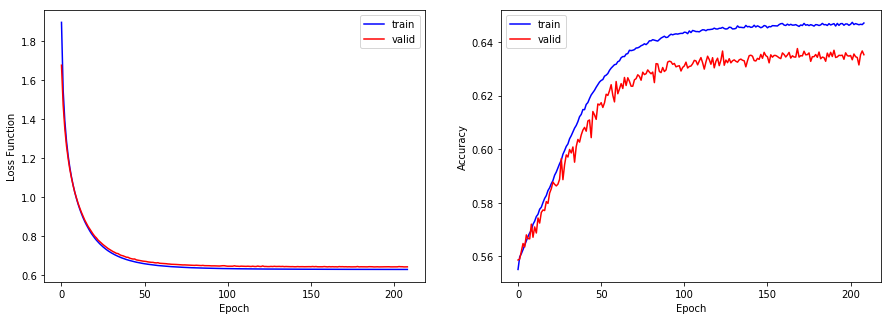

In [7]:
history(history_vgg16)

The predictions on the test dataset are calculated and the $F_1$ score is derived.

In [8]:
vgg16_predictions = vgg16.predict(test_vgg16)

In [9]:
vgg16_score = f1_score(test_targets, vgg16_predictions)
print('F1 score: %.2f' % vgg16_score)

F1 score: 0.67


## 2. Xception

In [10]:
import numpy as np

bottleneck_features = np.load('data/bottleneck_features/yelp_xception.npz')
train_xception = bottleneck_features['train_features']
valid_xception = bottleneck_features['valid_features']
test_xception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [11]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

xception = Sequential()
xception.add(GlobalAveragePooling2D(input_shape = train_xception.shape[1:]) )
xception.add(Dense(9, activation = 'sigmoid') )

xception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
xception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_xception.hdf5', verbose=1, save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_xception = xception.fit(train_xception, train_targets, validation_data=(valid_xception,valid_targets), 
                                epochs=300, batch_size=64, callbacks=[checkpointer,checkimprovement], 
                                verbose=0)


Epoch 00001: val_loss improved from inf to 0.80101, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00002: val_loss improved from 0.80101 to 0.75703, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00003: val_loss improved from 0.75703 to 0.73797, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00004: val_loss improved from 0.73797 to 0.72183, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00005: val_loss improved from 0.72183 to 0.71221, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00006: val_loss improved from 0.71221 to 0.70460, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00007: val_loss improved from 0.70460 to 0.69888, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00008: val_loss improved from 0.69888 to 0.69586, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00009: val_loss improved from


Epoch 00096: val_loss did not improve

Epoch 00097: val_loss did not improve

Epoch 00098: val_loss did not improve

Epoch 00099: val_loss did not improve

Epoch 00100: val_loss improved from 0.64817 to 0.64803, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00101: val_loss did not improve

Epoch 00102: val_loss did not improve

Epoch 00103: val_loss improved from 0.64803 to 0.64800, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00104: val_loss did not improve

Epoch 00105: val_loss did not improve

Epoch 00106: val_loss did not improve

Epoch 00107: val_loss did not improve

Epoch 00108: val_loss did not improve

Epoch 00109: val_loss improved from 0.64800 to 0.64754, saving model to data/saved_models/weights_compare_xception.hdf5

Epoch 00110: val_loss did not improve

Epoch 00111: val_loss did not improve

Epoch 00112: val_loss did not improve

Epoch 00113: val_loss did not improve

Epoch 00114: val_loss did not improve

Epoch 00115:

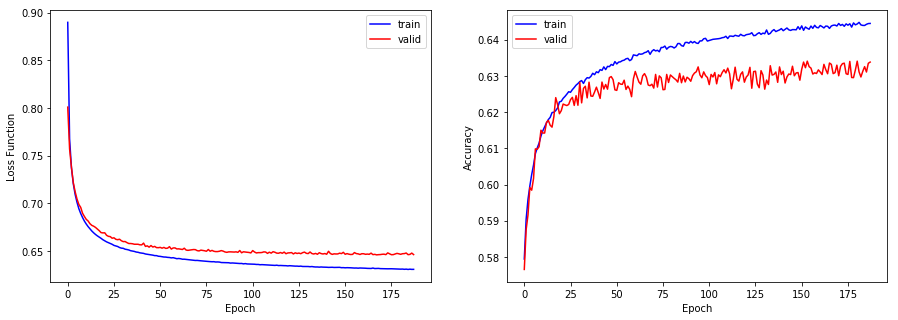

In [14]:
history(history_xception)

In [15]:
xception_predictions = xception.predict(test_xception)

In [16]:
xception_score = f1_score(test_targets, xception_predictions)
print('F1 score: %.2f' % xception_score)

F1 score: 0.65
